[View in Colaboratory](https://colab.research.google.com/github/marcelcerri/Arrhenius_model/blob/master/Modelo_de_Arrhenius_ajuste_aos_pontos_experimentais_de_forma_linear.ipynb)

# Aula 02 de Processos Fermentativos - Ajustes linear da dados experimentais de Arrhenius

In [0]:
# importando os pacotes do python
import numpy as np
from scipy.optimize import curve_fit
import io
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

#carregar o arquivo em csv
uploaded = files.upload()

Saving Arrhenius.csv to Arrhenius (1).csv


In [3]:
#verificação do upload
for fn in uploaded.keys():
  print('O arquivo "{name}" com tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

O arquivo "Arrhenius.csv" com tamanho de 82 bytes


In [0]:
#transformando o arquivo csv em data frame
calibracao_df = pd.read_csv(io.StringIO(uploaded['Arrhenius.csv'].decode('utf-8')))

In [5]:
#impressão do arquivo em data frame
calibracao_df

,Temperatura,k(T)
0,313,0.00043
1,319,0.00103
2,323,0.00180
3,328,0.00355
4,333,0.00717


In [0]:
#transformando data frame em vetor
calibracao_np = calibracao_df.values

In [7]:
#impressão do vetor
calibracao_np

array([[3.13e+02, 4.30e-04],
       [3.19e+02, 1.03e-03],
       [3.23e+02, 1.80e-03],
       [3.28e+02, 3.55e-03],
       [3.33e+02, 7.17e-03]])

In [8]:
#vetor do eixo x
x = 1/calibracao_np[:,0]
print(x)

[0.00319489 0.0031348  0.00309598 0.00304878 0.003003  ]


In [9]:
#vetor do eixo y
y = np.log(calibracao_np[:,1])
print(y)

[-7.75172535 -6.87819648 -6.31996861 -5.64080768 -4.93784962]


In [10]:
linear_p = np.polyfit(x, y, 1)
print(linear_p)

[-14611.68022831     38.92458044]


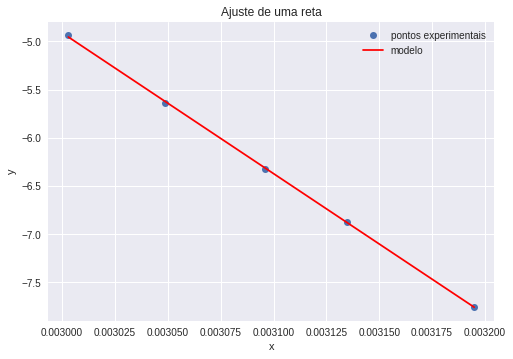

In [11]:
#impressão dos dados experimentais e do modelo linear
plt.plot(x, y, "o", label = "pontos experimentais")
plt.plot(x, np.polyval(linear_p, x), "-r", label = "modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.rcParams['figure.figsize'] = (11,7)
plt.title("Ajuste de uma reta")
plt.legend()
plt.show()

In [13]:
yfit = linear_p[0] * x + linear_p[1] # calcula os valores preditos
yresid = y - yfit # resíduo = valor real - valor ajustado (valor predito)
SQresid = sum(pow(yresid,2)) # soma dos quadrados dos resíduos 
SQtotal = len(y) * np.var(y) # número de elementos do vetor y vezes a variância de y
R2 = 1 - SQresid/SQtotal # coeficiente de determinação

print(R2) # imprime coeficiente de determinação


0.9998570770329075


In [16]:
#dados do modelo ajustado
dados_T = 1/x
dados_v = np.exp(yfit)
print(dados_T, dados_v)

[313. 319. 323. 328. 333.] [0.00042727 0.00102808 0.00181291 0.00361297 0.00705274]
